Descriptive Statistics: {'StarID': {'mean': 0.5, 'median': 0.5, 'std': 0.3086066999241838}, 'RA': {'mean': 0.40653263833962205, 'median': 0.3572604800124477, 'std': 0.2688352427571169}, 'Dec': {'mean': 0.5323928734194656, 'median': 0.472597004801221, 'std': 0.25386170004394676}, 'ApparentMagnitude': {'mean': 0.45820105820105816, 'median': 0.4497354497354497, 'std': 0.27375497529669407}, 'Distance': {'mean': 0.32922026560093254, 'median': 0.26401898338953417, 'std': 0.3059180852333556}}
Outliers: {'StarID': array([], dtype=float64), 'RA': array([1.]), 'Dec': array([0.]), 'ApparentMagnitude': array([], dtype=float64), 'Distance': array([1.])}


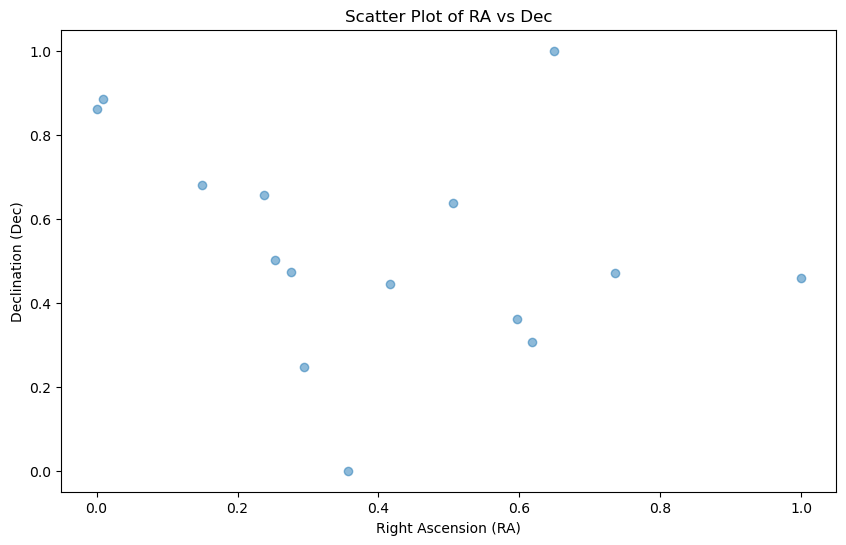

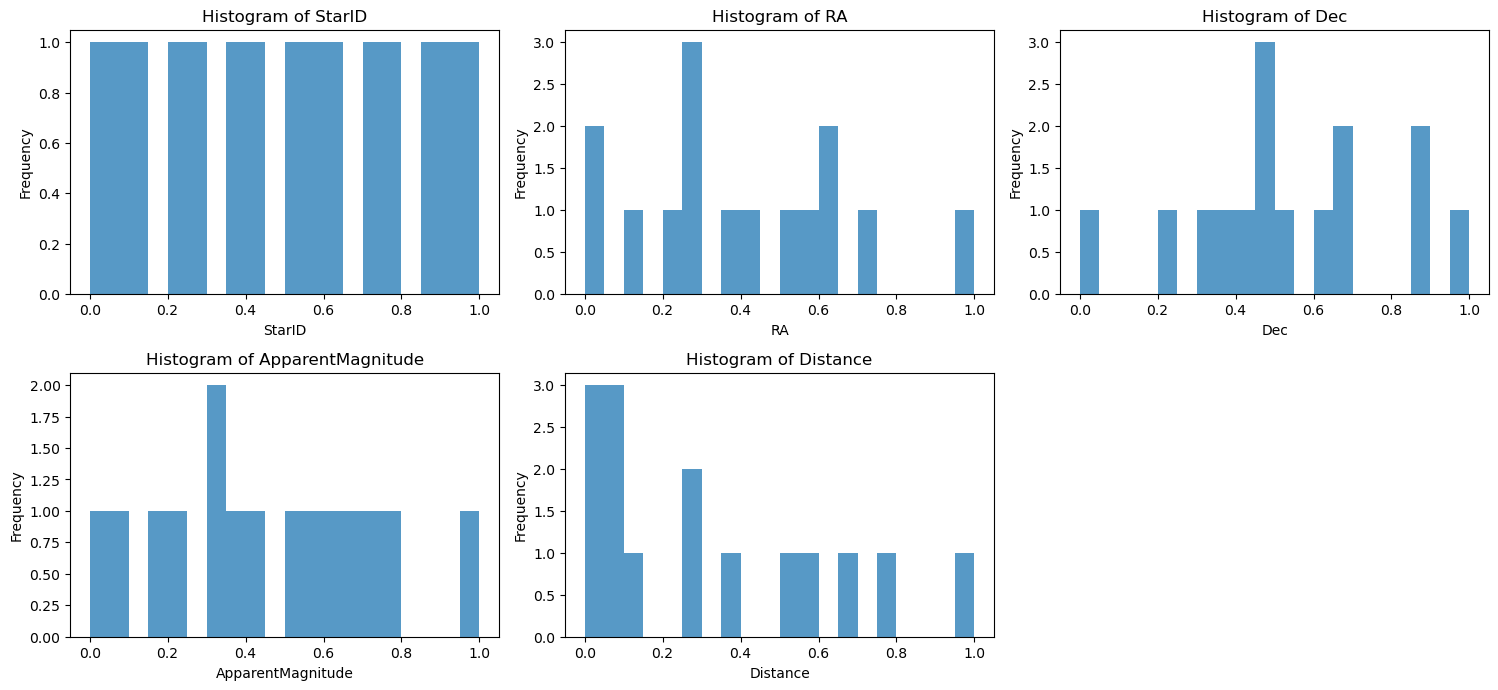

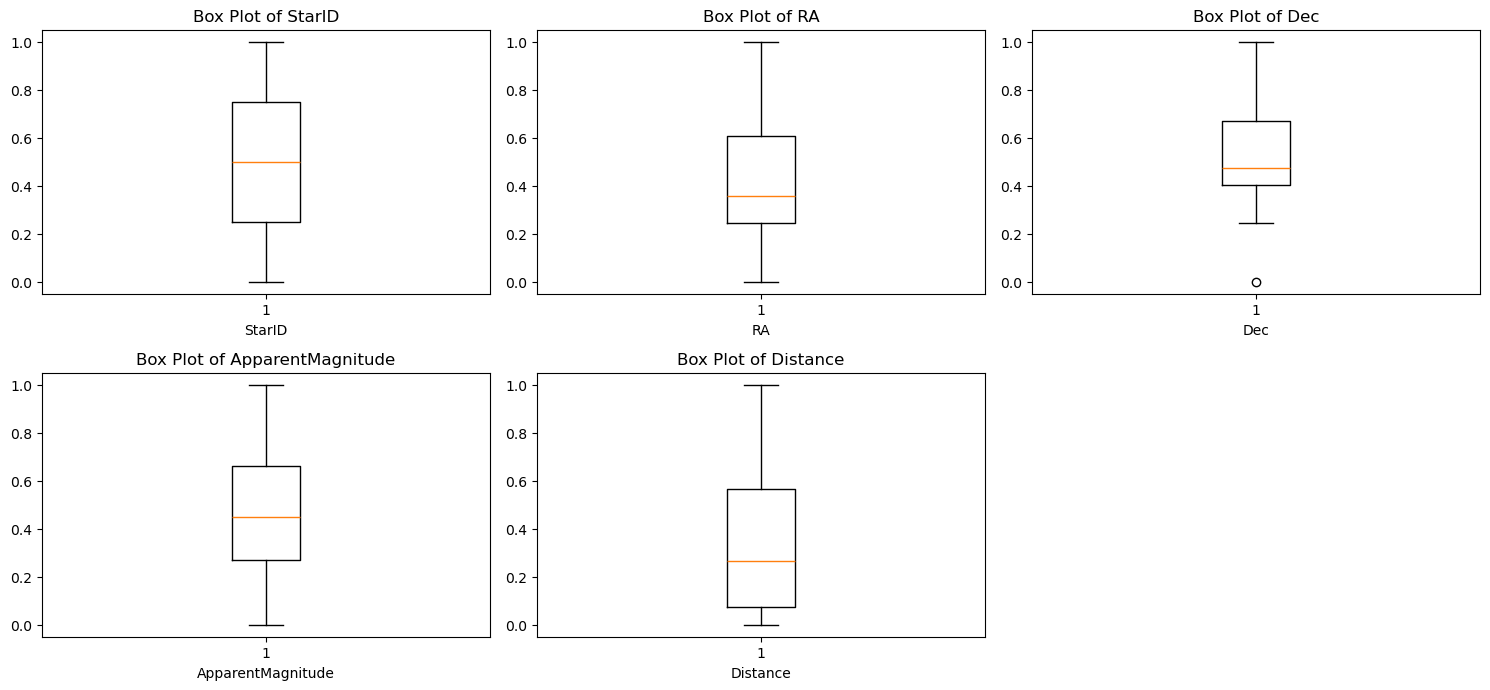

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read Astronomical Data
def read_data(file_path):
    # Assuming the data file is a CSV with headers
    data = np.genfromtxt(file_path, delimiter=',', names=True)
    return data

# Step 2: Data Cleaning and Preprocessing
def clean_data(data):
    # Handling missing values by filling them with the mean of the column
    for name in data.dtype.names:
        col_data = data[name]
        mean_value = np.nanmean(col_data)
        col_data[np.isnan(col_data)] = mean_value
    return data

def normalize_data(data):
    # Normalize data to a range of [0, 1]
    for name in data.dtype.names:
        col_data = data[name]
        data[name] = (col_data - np.min(col_data)) / (np.max(col_data) - np.min(col_data))
    return data

# Step 3: Statistical Analysis
def compute_statistics(data):
    stats = {}
    for name in data.dtype.names:
        col_data = data[name]
        stats[name] = {
            'mean': np.mean(col_data),
            'median': np.median(col_data),
            'std': np.std(col_data)
        }
    return stats

def identify_outliers(data):
    outliers = {}
    for name in data.dtype.names:
        col_data = data[name]
        mean = np.mean(col_data)
        std = np.std(col_data)
        outliers[name] = col_data[(col_data > mean + 2 * std) | (col_data < mean - 2 * std)]
    return outliers

# Step 4: Data Visualization
def visualize_data(data, stats):
    # Scatter plot of first two columns (RA and Dec)
    plt.figure(figsize=(10, 6))
    plt.scatter(data['RA'], data['Dec'], alpha=0.5)
    plt.xlabel('Right Ascension (RA)')
    plt.ylabel('Declination (Dec)')
    plt.title('Scatter Plot of RA vs Dec')
    plt.show()

    # Histograms of all attributes
    plt.figure(figsize=(15, 10))
    for i, name in enumerate(data.dtype.names):
        plt.subplot(3, 3, i+1)
        plt.hist(data[name], bins=20, alpha=0.75)
        plt.xlabel(name)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {name}')
    plt.tight_layout()
    plt.show()

    # Box plots to visualize outliers
    plt.figure(figsize=(15, 10))
    for i, name in enumerate(data.dtype.names):
        plt.subplot(3, 3, i+1)
        plt.boxplot(data[name])
        plt.xlabel(name)
        plt.title(f'Box Plot of {name}')
    plt.tight_layout()
    plt.show()

# Main function to execute the steps
def main(file_path):
    # Read data
    data = read_data(file_path)
    
    # Clean and preprocess data
    data = clean_data(data)
    data = normalize_data(data)
    
    # Compute statistics
    stats = compute_statistics(data)
    print("Descriptive Statistics:", stats)
    
    # Identify outliers
    outliers = identify_outliers(data)
    print("Outliers:", outliers)
    
    # Visualize data
    visualize_data(data, stats)

# Run the main function
if __name__ == "__main__":
    file_path = 'astronomical_data.csv'  # Path to the sample data file
    main(file_path)
